In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import talib

import vectorbt as vbt

In [2]:
symbols = 'BTC-USD'
start = '2020-01-01 UTC'
end = '2022-09-01 UTC'
ohlcv = vbt.YFData.download(symbols, start=start, end=end).concat()
ohlcv['Open']

C:\Users\bfore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\vectorbt\data\base.py:681: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_data = {c: pd.Series(


Date
2020-01-01 00:00:00+00:00     7194.892090
2020-01-02 00:00:00+00:00     7202.551270
2020-01-03 00:00:00+00:00     6984.428711
2020-01-04 00:00:00+00:00     7345.375488
2020-01-05 00:00:00+00:00     7410.451660
                                 ...     
2022-08-28 00:00:00+00:00    20041.035156
2022-08-29 00:00:00+00:00    19615.154297
2022-08-30 00:00:00+00:00    20298.611328
2022-08-31 00:00:00+00:00    19799.582031
2022-09-01 00:00:00+00:00    20050.498047
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

In [3]:
# Run every single pattern recognition indicator and combine the results
result = pd.DataFrame.vbt.empty_like(ohlcv['Open'], fill_value=0.)
result

Date
2020-01-01 00:00:00+00:00    0.0
2020-01-02 00:00:00+00:00    0.0
2020-01-03 00:00:00+00:00    0.0
2020-01-04 00:00:00+00:00    0.0
2020-01-05 00:00:00+00:00    0.0
                            ... 
2022-08-28 00:00:00+00:00    0.0
2022-08-29 00:00:00+00:00    0.0
2022-08-30 00:00:00+00:00    0.0
2022-08-31 00:00:00+00:00    0.0
2022-09-01 00:00:00+00:00    0.0
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

In [4]:
for pattern in talib.get_function_groups()['Pattern Recognition']:
    PRecognizer = vbt.IndicatorFactory.from_talib(pattern)
    pr = PRecognizer.run(ohlcv['Open'], ohlcv['High'], ohlcv['Low'], ohlcv['Close'])
    result = result + pr.integer
result

Date
2020-01-01 00:00:00+00:00      0.0
2020-01-02 00:00:00+00:00      0.0
2020-01-03 00:00:00+00:00    100.0
2020-01-04 00:00:00+00:00    100.0
2020-01-05 00:00:00+00:00      0.0
                             ...  
2022-08-28 00:00:00+00:00   -100.0
2022-08-29 00:00:00+00:00    500.0
2022-08-30 00:00:00+00:00      0.0
2022-08-31 00:00:00+00:00    100.0
2022-09-01 00:00:00+00:00    100.0
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

In [16]:
p = pr.integer
(p!=0).sum()

14

In [32]:
#Don't look into the future
result = result.vbt.fshift(1)
result

Date
2020-01-01 00:00:00+00:00      NaN
2020-01-02 00:00:00+00:00      0.0
2020-01-03 00:00:00+00:00      0.0
2020-01-04 00:00:00+00:00    100.0
2020-01-05 00:00:00+00:00    100.0
                             ...  
2022-08-28 00:00:00+00:00   -100.0
2022-08-29 00:00:00+00:00   -100.0
2022-08-30 00:00:00+00:00    500.0
2022-08-31 00:00:00+00:00      0.0
2022-09-01 00:00:00+00:00    100.0
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

In [33]:
 # Treat each number as order value in USD
size = result / ohlcv['Open']
size

Date
2020-01-01 00:00:00+00:00         NaN
2020-01-02 00:00:00+00:00    0.000000
2020-01-03 00:00:00+00:00    0.000000
2020-01-04 00:00:00+00:00    0.013614
2020-01-05 00:00:00+00:00    0.013494
                               ...   
2022-08-28 00:00:00+00:00   -0.004990
2022-08-29 00:00:00+00:00   -0.005098
2022-08-30 00:00:00+00:00    0.024632
2022-08-31 00:00:00+00:00    0.000000
2022-09-01 00:00:00+00:00    0.004987
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

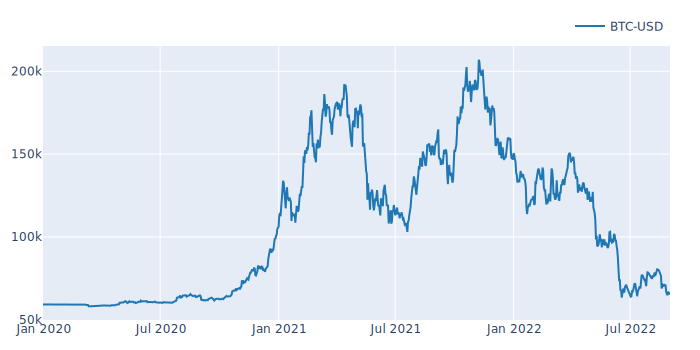

In [34]:
# Simulate portfolio
pf = vbt.Portfolio.from_orders(
    ohlcv['Close'], size, price=ohlcv['Open'],
    init_cash='autoalign', fees=0.001, slippage=0.001)

# Visualize portfolio value
pf.value().vbt.plot().show_svg()

In [35]:
## Simulate portfolio from signals
entries = result > 300
exits = result < -200

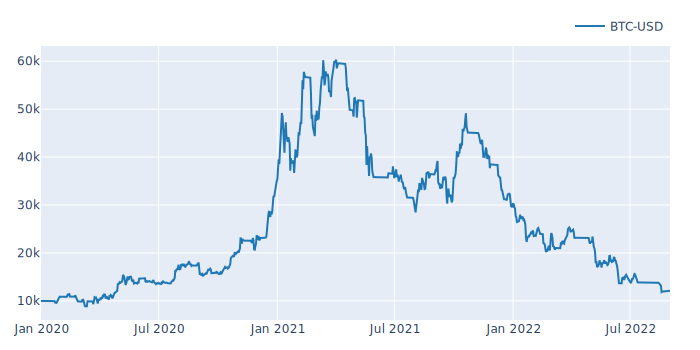

In [36]:
# Simulate portfolio
pf = vbt.Portfolio.from_signals(
    close=ohlcv['Close'], entries=entries, exits=exits, open=ohlcv['Open'],
    init_cash=10000, fees=0.001, slippage=0.001)

# Visualize portfolio value
pf.value().vbt.plot().show_svg()

In [53]:
from itertools import product

uppers = np.arange(100, 1000, 100)
lowers = np.arange(-1000, -100, 100)
uppers

array([100, 200, 300, 400, 500, 600, 700, 800, 900])

In [54]:
result

Date
2020-01-01 00:00:00+00:00      NaN
2020-01-02 00:00:00+00:00      0.0
2020-01-03 00:00:00+00:00      0.0
2020-01-04 00:00:00+00:00    100.0
2020-01-05 00:00:00+00:00    100.0
                             ...  
2022-08-28 00:00:00+00:00   -100.0
2022-08-29 00:00:00+00:00   -100.0
2022-08-30 00:00:00+00:00    500.0
2022-08-31 00:00:00+00:00      0.0
2022-09-01 00:00:00+00:00    100.0
Freq: D, Name: BTC-USD, Length: 975, dtype: float64

In [61]:
from numba import njit
@njit
def apply_ul_nb(value, lower, upper):
    entry_signal = np.full(value.shape, np.nan, dtype=np.bool_)
    exit_signal = np.full(value.shape, np.nan, dtype=np.bool_)
    for col in range(value.shape[1]):
        exit_signal[:,col] = value[:,col] < lower
        entry_signal[:,col] = value[:,col] > upper
            
    return entry_signal, exit_signal

def get_ULInd():
    return vbt.IndicatorFactory(
        class_name = 'UL',
        input_names = ['value'],
        param_names = ['lower', 'upper'],
        output_names = ['entry_signal', 'exit_signal']
    ).from_apply_func(apply_ul_nb)

In [62]:
ul_indicator = get_ULInd().run(value= result, lower=lowers, upper=uppers,\
            param_product=True)
entries = ul_indicator.entry_signal
exits = ul_indicator.exit_signal

In [63]:
entries

ul_lower                   -1000                                            \
ul_upper                     100    200    300    400    500    600    700   
Date                                                                         
2020-01-01 00:00:00+00:00  False  False  False  False  False  False  False   
2020-01-02 00:00:00+00:00  False  False  False  False  False  False  False   
2020-01-03 00:00:00+00:00  False  False  False  False  False  False  False   
2020-01-04 00:00:00+00:00  False  False  False  False  False  False  False   
2020-01-05 00:00:00+00:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2022-08-28 00:00:00+00:00  False  False  False  False  False  False  False   
2022-08-29 00:00:00+00:00  False  False  False  False  False  False  False   
2022-08-30 00:00:00+00:00   True   True   True   True  False  False  False   
2022-08-31 00:00:00+00:00  False  False  False  False  False  False  False   
2022-09-01 00:00:00+00:00  False  False  False  False  False  False  False   

ul_lower                                 -900   ...  -300   -200          \
ul_upper                     800    900    100  ...    900    100    200   
Date                                            ...                        
2020-01-01 00:00:00+00:00  False  False  False  ...  False  False  False   
2020-01-02 00:00:00+00:00  False  False  False  ...  False  False  False   
2020-01-03 00:00:00+00:00  False  False  False  ...  False  False  False   
2020-01-04 00:00:00+00:00  False  False  False  ...  False  False  False   
2020-01-05 00:00:00+00:00  False  False  False  ...  False  False  False   
...                          ...    ...    ...  ...    ...    ...    ...   
2022-08-28 00:00:00+00:00  False  False  False  ...  False  False  False   
2022-08-29 00:00:00+00:00  False  False  False  ...  False  False  False   
2022-08-30 00:00:00+00:00  False  False   True  ...  False   True   True   
2022-08-31 00:00:00+00:00  False  False  False  ...  False  False  False   
2022-09-01 00:00:00+00:00  False  False  False  ...  False  False  False   

ul_lower                                                                    
ul_upper                     300    400    500    600    700    800    900  
Date                                                                        
2020-01-01 00:00:00+00:00  False  False  False  False  False  False  False  
2020-01-02 00:00:00+00:00  False  False  False  False  False  False  False  
2020-01-03 00:00:00+00:00  False  False  False  False  False  False  False  
2020-01-04 00:00:00+00:00  False  False  False  False  False  False  False  
2020-01-05 00:00:00+00:00  False  False  False  False  False  False  False  
...                          ...    ...    ...    ...    ...    ...    ...  
2022-08-28 00:00:00+00:00  False  False  False  False  False  False  False  
2022-08-29 00:00:00+00:00  False  False  False  False  False  False  False  
2022-08-30 00:00:00+00:00   True   True  False  False  False  False  False  
2022-08-31 00:00:00+00:00  False  False  False  False  False  False  False  
2022-09-01 00:00:00+00:00  False  False  False  False  False  False  False  

[975 rows x 81 columns]

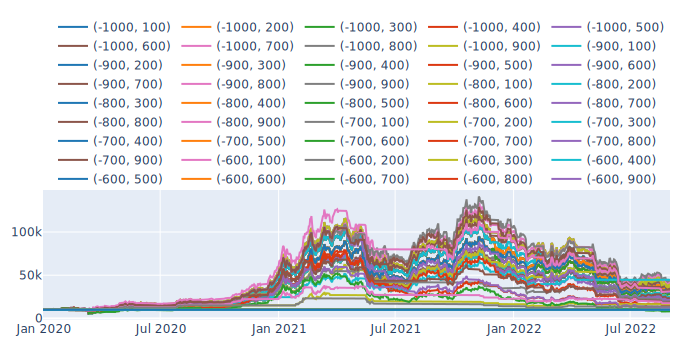

In [64]:
# Simulate portfolio
pf = vbt.Portfolio.from_signals(
    close=ohlcv['Close'], entries=entries, exits=exits, open=ohlcv['Open'],
    init_cash=10000, fees=0.001, slippage=0.001)



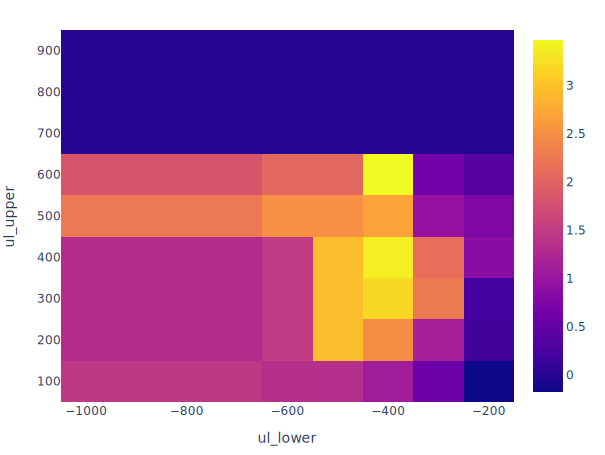

In [66]:
# Visualize portfolio value
pf.total_return().vbt.heatmap(
                        x_level='ul_lower', 
                        y_level='ul_upper',
                    ).show_svg()

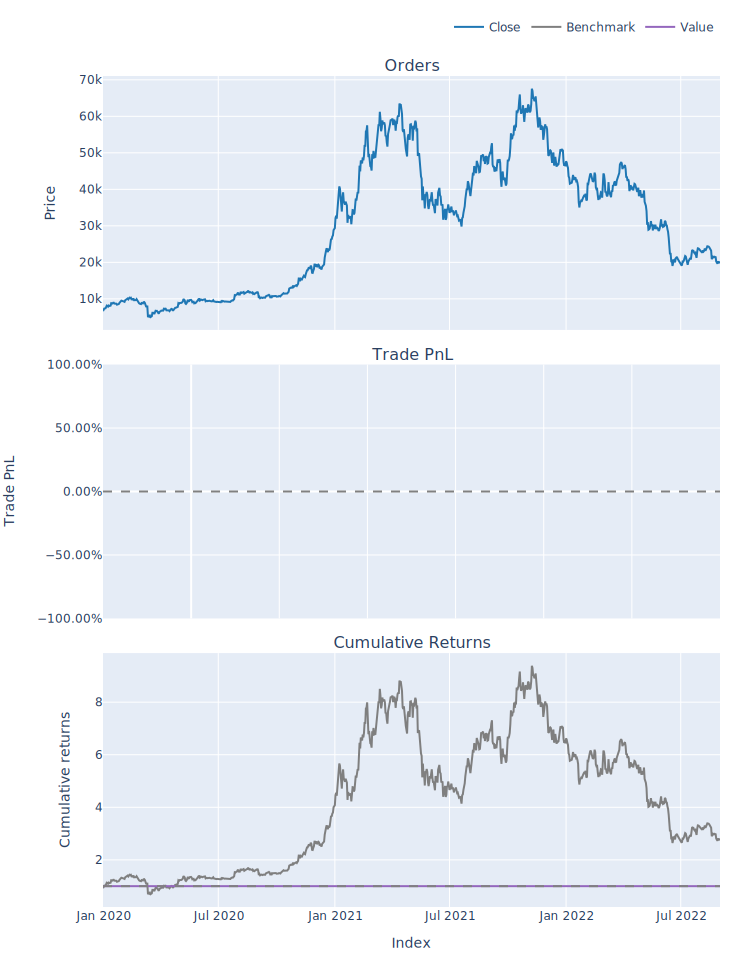

In [67]:
idxmax = (pf.sharpe_ratio().idxmax())
pf[idxmax].plot().show_svg()

In [1]:
selected_pfs = []
len(selected_pfs)

0